In [ ]:
"""### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?"""

In [11]:
import pandas as pd 
df= pd.read_csv (r"C:\Users\leana\Desktop\LABORATORY\semaine 5  statistique eda\lab-eda-univariate\amz_uk_price_prediction_dataset.csv")
df.columns
frequency_table = df['category'].value_counts()
top5 = frequency_table.head(5)
top5


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [ ]:
"""2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. 
    *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?"""

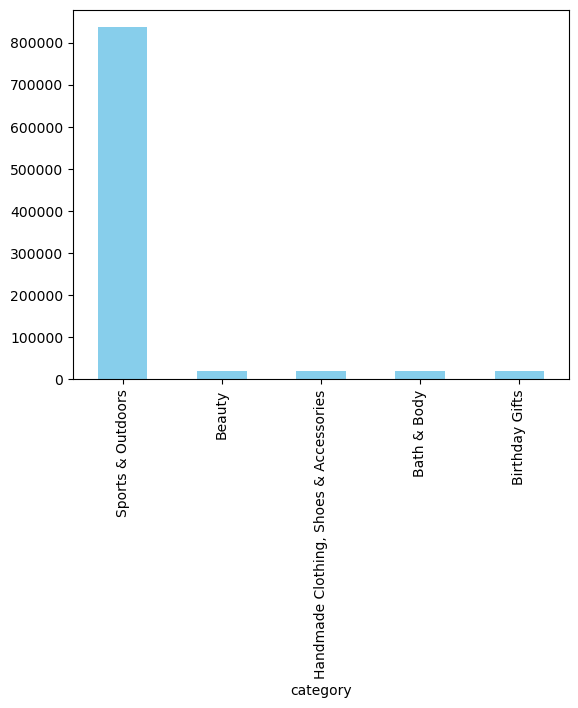

In [23]:
import matplotlib.pyplot as plt

#frequency_table.plot (kind='bar', color='skyblue')
bar = top5.plot(kind='bar', color='skyblue')



([<matplotlib.patches.Wedge object at 0x00000216536F7F90>, <matplotlib.patches.Wedge object at 0x00000216194A2E10>, <matplotlib.patches.Wedge object at 0x00000216194A1C90>, <matplotlib.patches.Wedge object at 0x0000021619498B10>, <matplotlib.patches.Wedge object at 0x0000021619499D90>], [Text(-1.0619894641325325, 0.2866677136886831, 'Sports & Outdoors'), Text(0.9852466974708041, -0.48917169288796164, 'Beauty'), Text(1.0412846831644893, -0.3545789173188805, 'Handmade Clothing, Shoes & Accessories'), Text(1.0788687885174035, -0.21457431617737963, 'Bath & Body'), Text(1.0976547688734235, -0.07179142267312413, 'Birthday Gifts')])


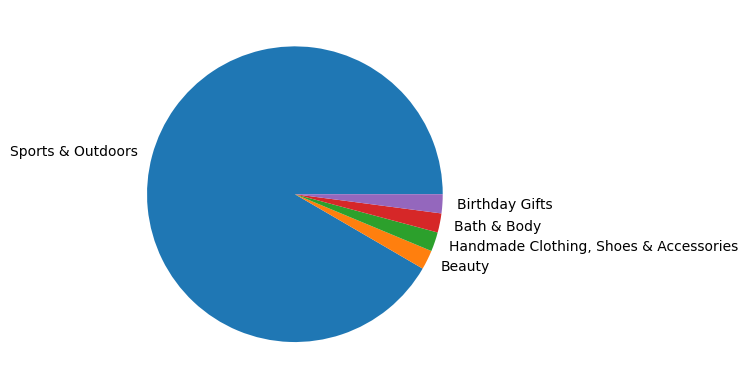

In [19]:

pie = plt.pie(top5, labels=top5.index)

print (pie)

In [ ]:
"""### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?"""


In [59]:
import pandas as pd 
df= pd.read_csv (r"C:\Users\leana\Desktop\LABORATORY\semaine 5  statistique eda\lab-eda-univariate\amz_uk_price_prediction_dataset.csv")
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [30]:
mean_p = df["price"].mean()
print(mean_p)
med_p = df["price"].median()
print (med_p)
mod_p = df["price"].mode()
print (mod_p)

89.24380943923663
19.09
0    9.99
Name: price, dtype: float64


In [ ]:
#average is superior of the median and the mode because their is price really hight in small number


In [ ]:
"""2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?"""

In [31]:
import numpy as np
variance_p = df['price'].var()

std_dev_p = df['price'].std()


range_p = np.ptp(df['price']) 


q75, q25 = np.percentile(df['price'], [75 ,25])
iqr_p = q75 - q25

print(variance_p)
print( std_dev_p)
print( range_p)
print( iqr_p)

119445.48532256528
345.60886175352226
100000.0
36.0


In [ ]:
# the interquartil range is small so most of the price are here but the huge variance and range show their is big diference in extrem price 

In [ ]:
"""**Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 
"""

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

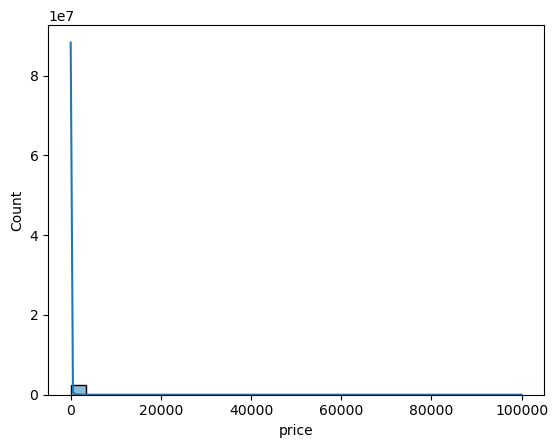

In [62]:
sns.histplot(data=df["price"], bins=30, kde=True)
plt.show

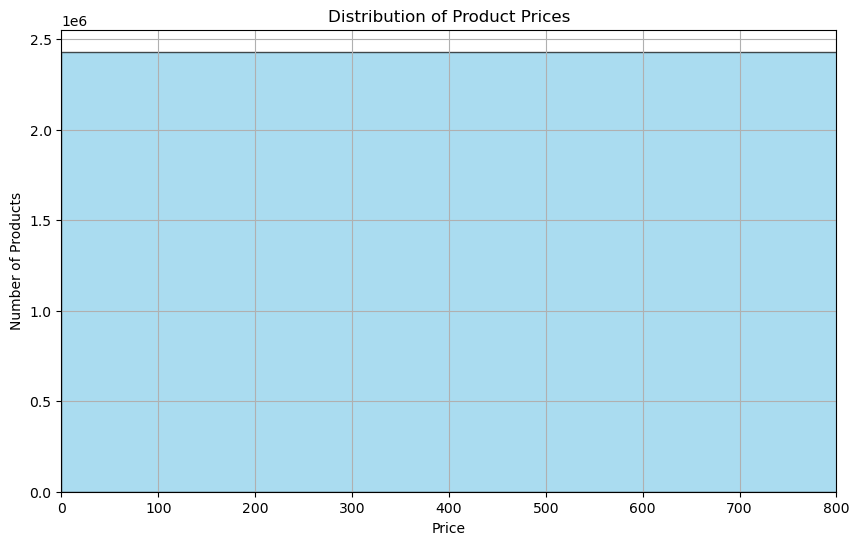

In [57]:
#trying to make it better 

import matplotlib.pyplot as plt

# Determine the number of bins dynamically based on the length of the 'price' column
bins = min(50, len(df['price']) // 10)

# Plot histogram to visualize the distribution of product prices with improved features
plt.figure(figsize=(10, 6))  # Set a larger figure size for better readability
hist = plt.hist(df['price'], bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.xlim(0, max(df['price']) if max(df['price']) < 800 else 800)  # Adjust xlim if needed, based on your data
plt.grid(True)
plt.show()


(0.0, 800.0)

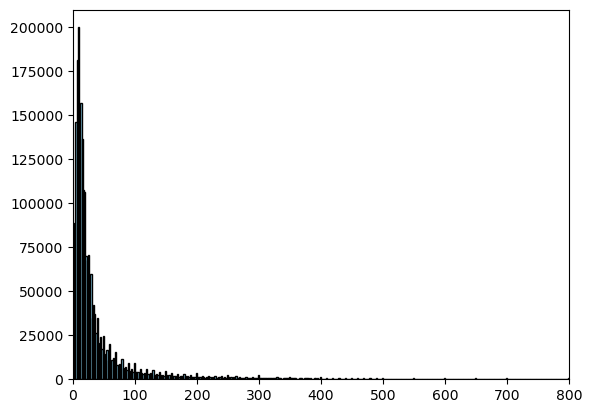

In [58]:
#comprehensible one 
hist = plt.hist(df['price'], bins=50000, color='skyblue', edgecolor='black')
plt.xlim(0, 800)

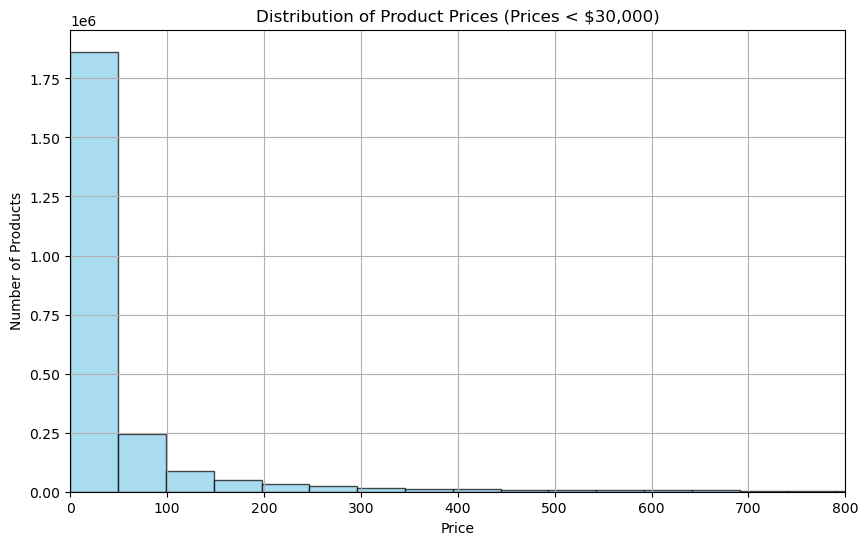

In [67]:
#comprehensible one  without exeptions 
filtered_prices = df[df['price'] < 30000]['price']

# Plot histogram to visualize the distribution of product prices
plt.figure(figsize=(10, 6))
hist = plt.hist(filtered_prices, bins= 500, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Product Prices (Prices < $30,000)')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.xlim(0, 800)  # Adjust xlim as needed
plt.grid(True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D object at 0x00000216860A0890>, <matplotlib.lines.Line2D object at 0x00000216860A1510>], 'caps': [<matplotlib.lines.Line2D object at 0x00000216860A2090>, <matplotlib.lines.Line2D object at 0x00000216860A2A90>], 'boxes': [<matplotlib.lines.Line2D object at 0x000002168606BE50>], 'medians': [<matplotlib.lines.Line2D object at 0x00000216860A36D0>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000021686021450>], 'means': []}


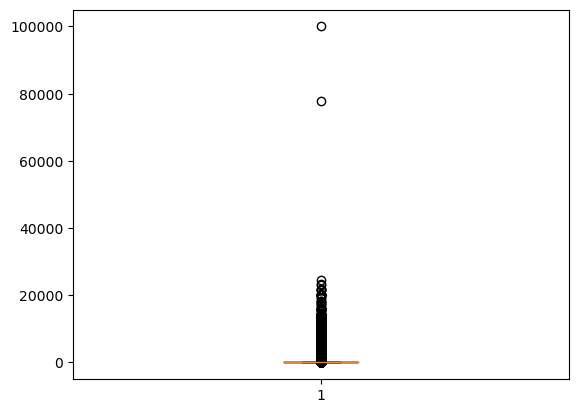

In [63]:
#we can see the outliers 
box=plt.boxplot(df['price'], vert=True)
print(box)


In [ ]:
"""## Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?
"""

In [76]:


mean_s = df["stars"].mean()
print(mean_s)
med_s = df["stars"].median()
print (med_s)
mod_s = df["stars"].mode()
print (mod_s)
# lots of 0 maybe errors in the data 

2.152836472966065
0.0
0    0.0
Name: stars, dtype: float64


In [ ]:
"""**Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?"""

In [77]:
import numpy as np
variance_s = df['stars'].var()

std_dev_s = df['stars'].std()


range_s = np.ptp(df['stars']) 


q75, q25 = np.percentile(df['stars'], [75 ,25])
iqr_s = q75 - q25

print(variance_s)
print( std_dev_s)
print( range_s)
print( iqr_s)

# because of the first result that makes no real sens 

4.81743402976196
2.1948653785054697
5.0
4.4


In [ ]:
"""4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?""""lab 1.ipynb"

(0.0, 5.0)

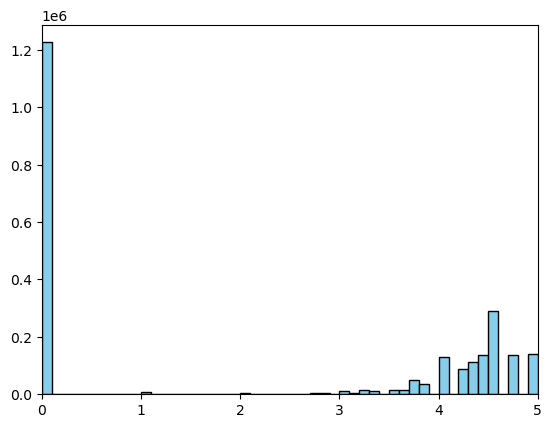

In [79]:
hist = plt.hist(df['stars'], bins= 50, color='skyblue', edgecolor='black')
plt.xlim(0, 5)

#lot of zero  or null as said earlier